<a href="https://colab.research.google.com/github/hoabinh2310/DL_Tutorial/blob/master/EMNIST_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/Colab Notebooks/EMNIST2

/content/drive/My Drive/Colab Notebooks/EMNIST2


In [3]:
import torch
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [5]:
!pip install emnist

In [6]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from emnist import list_datasets
from emnist import extract_training_samples
from emnist import extract_test_samples
import os
import tensorflow as tf
from tensorflow import keras

In [7]:
# 2. Load dữ liệu MNIST
import random

(X_train, y_train) = extract_training_samples('letters')
(X_test, y_test) = extract_test_samples('letters')
print(X_train.shape)

shuffle_order = list(range(124800))
random.shuffle(shuffle_order)

X_train = X_train[shuffle_order]
y_train = y_train[shuffle_order]
X_val, y_val = X_train[100000:,:], y_train[100000:]
X_train, y_train = X_train[:100000,:], y_train[:100000]
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(124800, 28, 28)
(100000, 28, 28)
(24800, 28, 28)
(20800, 28, 28)


In [8]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 27)
Y_val = np_utils.to_categorical(y_val, 27)
Y_test = np_utils.to_categorical(y_test, 27)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  20
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0.]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1.]


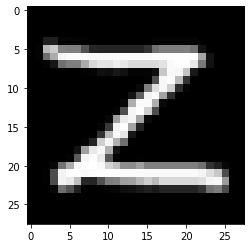

In [10]:
i = 20799
plt.imshow(X_test[i].reshape(28,28), cmap='gray')
print(Y_test[i])

In [11]:
# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

model.add(Dropout(0.2))  

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

model.add(Dropout(0.2))  

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(27, activation='softmax'))


In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [12]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

# Train the model with the new callback
H = model.fit(X_train, 
          Y_train,  
          epochs=30,
          validation_data=(X_test,Y_test),
          verbose=1)  # Pass callback to training

Epoch 1/30
3125/3125 [==============================] - 9s 3ms/step - loss: 0.7758 - accuracy: 0.7786 - val_loss: 0.3511 - val_accuracy: 0.8946
Epoch 2/30
3125/3125 [==============================] - 9s 3ms/step - loss: 0.3484 - accuracy: 0.8912 - val_loss: 0.2836 - val_accuracy: 0.9086
Epoch 3/30
3125/3125 [==============================] - 9s 3ms/step - loss: 0.2891 - accuracy: 0.9080 - val_loss: 0.2458 - val_accuracy: 0.9204
Epoch 4/30
3125/3125 [==============================] - 9s 3ms/step - loss: 0.2547 - accuracy: 0.9171 - val_loss: 0.2377 - val_accuracy: 0.9225
Epoch 5/30
3125/3125 [==============================] - 9s 3ms/step - loss: 0.2303 - accuracy: 0.9227 - val_loss: 0.2361 - val_accuracy: 0.9243
Epoch 6/30
3125/3125 [==============================] - 9s 3ms/step - loss: 0.2112 - accuracy: 0.9284 - val_loss: 0.2261 - val_accuracy: 0.9281
Epoch 7/30
3125/3125 [==============================] - 9s 3ms/step - loss: 0.2007 - accuracy: 0.9305 - val_loss: 0.2231 - val_accuracy:

In [14]:
model.save('model_sigmoid_letters.h5')

In [16]:
loss, acc = model.evaluate(X_test,  Y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

650/650 - 1s - loss: 0.2577 - accuracy: 0.9323
Restored model, accuracy: 93.23%


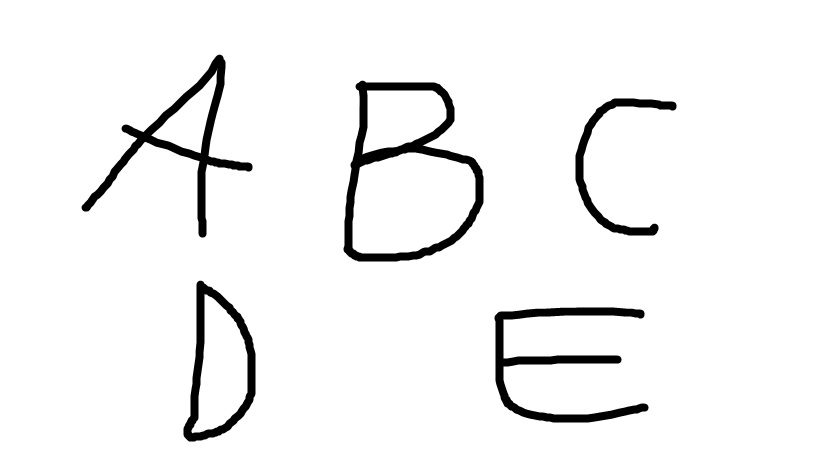

In [30]:
from keras.models import load_model
from google.colab.patches import cv2_imshow

# new_model = load_model('my_model0708.h5')
image = cv2.imread("img3.jpg")
cv2_imshow(image)
im_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
im_blur = cv2.GaussianBlur(im_gray,(5,5),0)
im,thre = cv2.threshold(im_blur,90,255,cv2.THRESH_BINARY_INV)
contours,hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

5


4


3


2


1


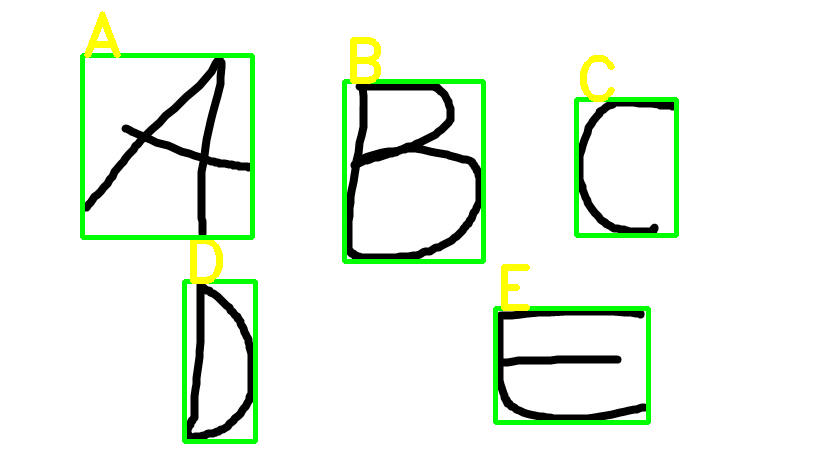

In [31]:
for i in contours:
  (x,y,w,h) = cv2.boundingRect(i)
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
  #cv2_imshow(image)
  roi = thre[y:y+h,x:x+w]
  roi = np.pad(roi,(20,20),'constant',constant_values=(0,0))
  roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
  cv2_imshow(roi)
  roi = cv2.dilate(roi, (3, 3))
  cv2_imshow(roi)
  tmp = model.predict(roi.reshape(1,28,28,1))
  c = 0
  for i in range(0,27):
    if tmp[0][i] > tmp[0][c]: c = i
  print(c)
  cv2.putText(image, str(chr(ord('A') + c - 1)), (x, y), cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
  #cv2_imshow(image)
cv2.imwrite("image_pand3.jpg",image)
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()

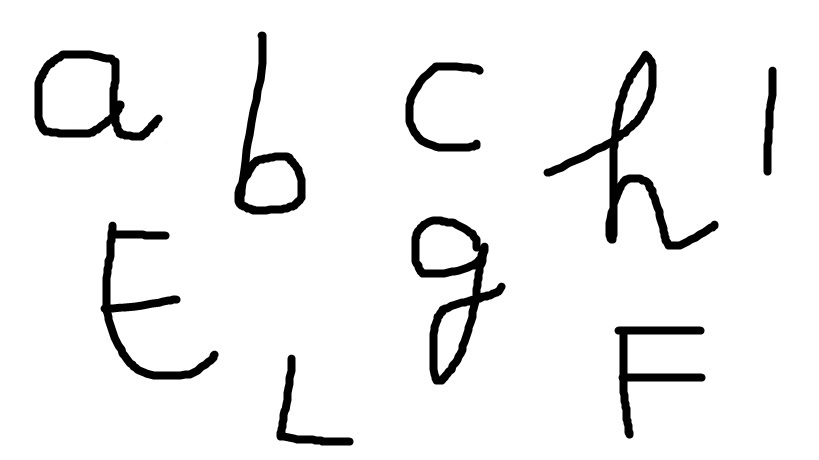

In [32]:
from keras.models import load_model
from google.colab.patches import cv2_imshow

# new_model = load_model('model_sigmoid_letters.h5')
image = cv2.imread("img2.jpg")
cv2_imshow(image)
im_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
im_blur = cv2.GaussianBlur(im_gray,(5,5),0)
im,thre = cv2.threshold(im_blur,90,255,cv2.THRESH_BINARY_INV)
contours,hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

12


6


5


7


9


3


8


1


12


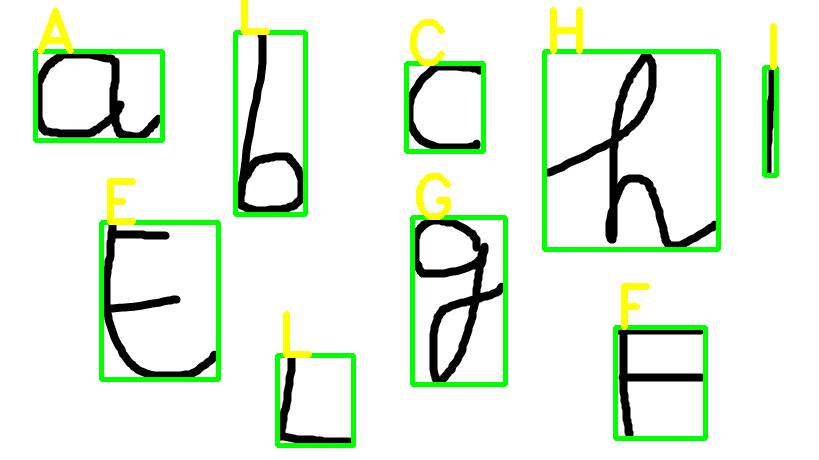

In [33]:
for i in contours:
  (x,y,w,h) = cv2.boundingRect(i)
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
  #cv2_imshow(image)
  roi = thre[y:y+h,x:x+w]
  roi = np.pad(roi,(20,20),'constant',constant_values=(0,0))
  roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
  cv2_imshow(roi)
  roi = cv2.dilate(roi, (3, 3))
  cv2_imshow(roi)
  tmp = model.predict(roi.reshape(1,28,28,1))
  c = 0
  for i in range(0,27):
    if tmp[0][i] > tmp[0][c]: c = i
  print(c)
  cv2.putText(image, str(chr(ord('A') + c - 1)), (x, y), cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
  #cv2_imshow(image)
cv2.imwrite("image_pand2.jpg",image)
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()

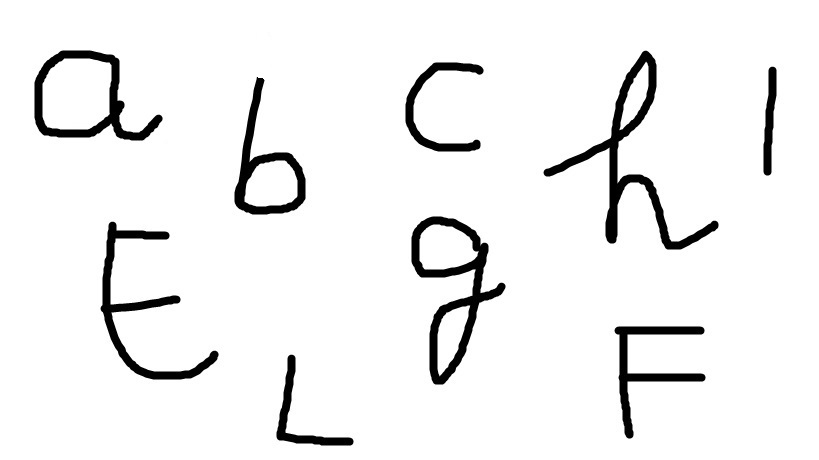

In [34]:
from keras.models import load_model
from google.colab.patches import cv2_imshow

new_model = load_model('model_sigmoid_letters.h5')
image = cv2.imread("img4.jpg")
cv2_imshow(image)
im_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
im_blur = cv2.GaussianBlur(im_gray,(5,5),0)
im,thre = cv2.threshold(im_blur,90,255,cv2.THRESH_BINARY_INV)
contours,hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

12


6


5


7


2


9


3


8


1


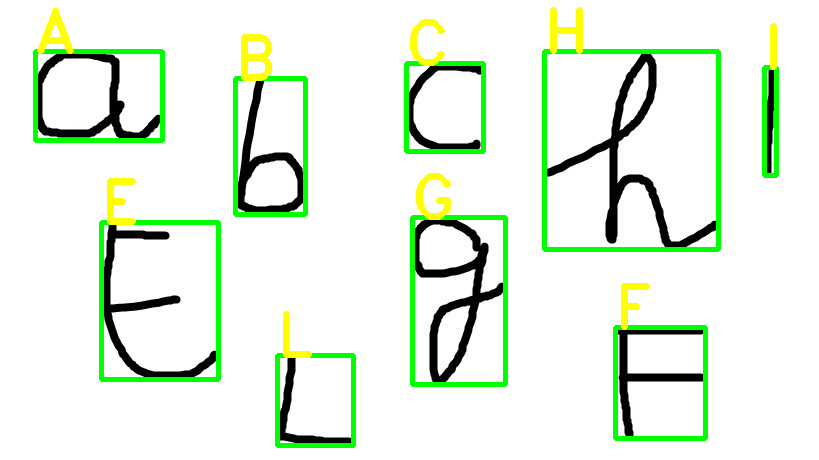

In [35]:
for i in contours:
  (x,y,w,h) = cv2.boundingRect(i)
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
  #cv2_imshow(image)
  roi = thre[y:y+h,x:x+w]
  roi = np.pad(roi,(20,20),'constant',constant_values=(0,0))
  roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
  cv2_imshow(roi)
  roi = cv2.dilate(roi, (3, 3))
  cv2_imshow(roi)
  tmp = new_model.predict(roi.reshape(1,28,28,1))
  c = 0
  for i in range(0,27):
    if tmp[0][i] > tmp[0][c]: c = i
  print(c)
  cv2.putText(image, str(chr(ord('A') + c - 1)), (x, y), cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)
  #cv2_imshow(image)
cv2.imwrite("image_pand4.jpg",image)
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()